***
# **<center>Exercices#8</center>**
# ***<center>Fichiers</center>***

***

***
<u>Exercice 1: </u> *Fichiers, dossiers et Pandas.*

1- Ouvrir le fichier E15_bis.xy et afficher son contenu  
2- Quel est son nombre de ligne?  
3- Charger l'ensemble des données dans un tableau numpy nommé data. Donner ses dimensions.  
4- tracer la seconde colonne en fonction de la première et sauver une image du graphique.  

 ***<center>SOLUTION</center>***

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 1- Ouvrir le fichier E15_bis.xy et afficher son contenu

chemin = 'fichier_exercices_enonces/8_fichiers/E15_bis.xy'

with open(chemin, 'r') as fichier:
    contenu = fichier.read()
# print(contenu)

2- Quel est son nombre de ligne? 

In [3]:
# 2- Quel est son nombre de ligne?

with open(chemin, 'r') as fichier:
    lignes = fichier.readlines()  # Lecture de toutes les lignes du fichier
nombre_lignes = len(lignes)  # Nombre de lignes dans le fichier 
print(nombre_lignes,'lignes')

3808 lignes


In [4]:
# 3- Charger l'ensemble des données dans un tableau numpy nommé data. Donner ses dimensions

with open(chemin, 'r') as fichier:
    data = np.loadtxt(fichier, unpack = True)
print(type(data))
print(data.shape)


<class 'numpy.ndarray'>
(2, 3808)


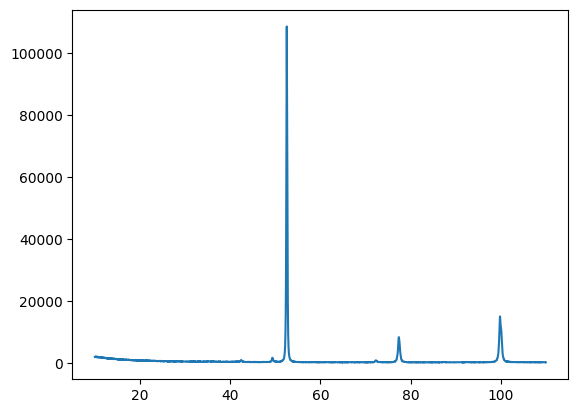

In [5]:
# 4- tracer la seconde colonne en fonction de la première et sauver une image du graphique.  

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(data[0],data[1])
plt.savefig('fichier_exercices_crees/fichiers/data.jpg')

***
<u>Exercice 2:</u> *Fichiers, dossiers et Pandas.* 

1. Créez un dossier appelé 'exercice2' dans le dossier fichiers_exercices_crees en utilisant le chemin relatif
2. Dans le dossier exercice2, créez quatre dossiers nommés 'dossier1', 'dossier2', ..., 'dossier4'.
3. Dans le dossier 'dossier1', créez dix fichiers textes appelés 'fichier0.txt', 'fichier1.txt', ..., 'fichier10.txt'.
4. Remplir les 10 fichiers avec chacun 2 colonnes séparées par une tabulation  :
- la premiere contenant des nombres decimaux commençant à 0, jusqu'à 100 avec un pas de 0.5
- la deuxieme contenant un nombre aleatoire obtenu par une distribution gaussienne
5. Récupérer les données contenus dans les 10 fichiers texte pour les rassembler dans un pandas dataframe.
On utilisera la fonction  pd.read_csv(filename, sep='\t', header=None, usecols=[1] dans une boucle pour récupérer les nombres aléatoires de chaque fichier.
6. Ajouter des noms aux lignes et aux colonnes
7. Explorer succitement le dataset (regarder quelques lignes, donner les statistiques sur les valeurs aléatoires, representer les distribution des données)

In [6]:
# 1 - créez un dossier appelé 'exercice2' dans le dossier fichiers_exercices_crees en utilisant le chemin relatif  

import os
chemin = 'fichier_exercices_crees/fichiers/exercice2'

# Vérifier si le dossier existe déjà
if os.path.exists(chemin):
    print("Le dossier existe déjà.")
else:
    # Créer le dossier
    os.mkdir(chemin)
    print("Le dossier a été créé avec succès.")


Le dossier existe déjà.


In [7]:
# 2- Dans le dossier exercice2, créez quatre dossiers nommés 'dossier1', 'dossier2', ..., 'dossier4'.

for i in range(1, 5):
 
    nom_dossier = 'dossier'+str(i)
    chemin_dossier = os.path.join(chemin, nom_dossier)
    # chemin_dossier = chemin+nom_dossier
    print(chemin_dossier)
    
    # Vérifier si le dossier existe déjà
    if os.path.exists(chemin_dossier):
        print(nom_dossier,' existe déja')

    else:
        # Créer le dossier
        os.mkdir(chemin_dossier)
        print(nom_dossier,' crée avec succès')



fichier_exercices_crees/fichiers/exercice2\dossier1
dossier1  existe déja
fichier_exercices_crees/fichiers/exercice2\dossier2
dossier2  existe déja
fichier_exercices_crees/fichiers/exercice2\dossier3
dossier3  existe déja
fichier_exercices_crees/fichiers/exercice2\dossier4
dossier4  existe déja


In [8]:
# 3. Dans le dossier 'dossier1', créez dix fichiers textes appelés 'fichier0.txt', 'fichier1.txt', ..., 'fichier10.txt'.

chemin = 'fichier_exercices_crees/fichiers/exercice2/dossier1' 
# Créer les fichiers
for i in range(0, 11):
    nom_fichier = 'fichier'+str(i)+'.txt'
    chemin_fichier = os.path.join(chemin, nom_fichier)
    
    # Vérifier si le fichier existe déjà
    if os.path.exists(chemin_fichier):
        print(f"Le fichier {nom_fichier} existe déjà.")
    else:
        # Créer le fichier
        with open(chemin_fichier, 'w') as fichier:
            pass
        print(f"Le fichier {nom_fichier} a été créé avec succès.")


Le fichier fichier0.txt existe déjà.
Le fichier fichier1.txt existe déjà.
Le fichier fichier2.txt existe déjà.
Le fichier fichier3.txt existe déjà.
Le fichier fichier4.txt existe déjà.
Le fichier fichier5.txt existe déjà.
Le fichier fichier6.txt existe déjà.
Le fichier fichier7.txt existe déjà.
Le fichier fichier8.txt existe déjà.
Le fichier fichier9.txt existe déjà.
Le fichier fichier10.txt existe déjà.


In [9]:
# 4. Remplir les 10 fichiers avec chacun 2 colonnes séparées par une tabulation  :
# - la premiere contenant des nombres decimaux commençant à 0, jusqu'à 100 avec un pas de 0.5
# - la deuxieme contenant un nombre aleatoire obtenu par une distribution gaussienne


import random
import numpy as np


# # Liste les fichiers dans le répertoire spécifié par 'chemin'
fichiers = os.listdir(chemin)

# Crée une liste pour stocker les chemins absolus de tous les fichiers dans 'chemin'
liste_chemin_absolu = []

# Parcourt tous les fichiers trouvés dans 'chemin'
for f in fichiers:
    # Crée le chemin absolu en joignant le nom du fichier à 'chemin'
    chemin_absolu = os.path.join(chemin, f)
    # Ajoute le chemin absolu à la liste 'liste_chemin_absolu'
    liste_chemin_absolu.append(chemin_absolu)
    
# Parcourt tous les fichiers dans 'liste_chemin_absolu'
for filename in liste_chemin_absolu:  
    # Ouvre chaque fichier en mode 'ajout' ('a'), ce qui permet d'ajouter du contenu sans écraser le fichier existant
    with open(filename, 'a') as file:
        # Écrit une en-tête dans le fichier
        file.write("Decimal Number\tRandom Number\n")
        # Génère une liste de nombres décimaux allant de 0 à 100.5 par pas de 0.5 à l'aide de NumPy
        decimal_numbers = np.arange(0, 100.5, 0.5)
        # Parcourt chaque nombre décimal dans la liste
        for decimal_number in decimal_numbers:
            # Génère un nombre aléatoire à partir d'une distribution gaussienne (normale) avec une moyenne de 0 et un écart type de 1
            random_number = random.gauss(0, 1)
            # Écrit dans le fichier le nombre décimal et son nombre aléatoire correspondant, séparés par une tabulation et suivis d'un saut de ligne
            file.write(str(decimal_number) + "\t" + str(random_number) + "\n")


In [10]:
#5. Récupérer les données contenus dans les 10 fichiers texte pour les rassembler dans un pandas dataframe.

import pandas as pd

# Créer une liste vide pour stocker les données de chaque colonne
data_columns = []
# Parcourir la liste des chemins absolus
for filename in liste_chemin_absolu:
    # Lire le fichier en utilisant la tabulation comme délimiteur
    data = pd.read_csv(filename, sep='\t', header=None, usecols=[1])
    # Ajouter les données à la liste des colonnes
    data_columns.append(data[1])

# Créer le DataFrame en utilisant la liste des colonnes
df = pd.DataFrame(data_columns).T

# Afficher le DataFrame
print(df.shape)

(404, 11)


In [11]:
# 6. Ajouter des noms aux lignes et aux colonnes
colonne1 = pd.read_csv(filename, sep='\t', header=None, usecols=[0])
colonne1 = colonne1.iloc[:, 0]  # Sélectionner la première colonne
df.index = colonne1

# Ajouter des noms aux colonnes
nom_colonnes = [f"Colonne_{i}" for i in range(df.shape[1])]
df.columns = nom_colonnes

In [12]:
#7. Explorer succitement le dataset (regarder quelques lignes, donner les statistiques sur les valeurs aléatoires, representer les distribution des données)

In [13]:
df.head()

,Colonne_0,Colonne_1,Colonne_2,Colonne_3,Colonne_4,Colonne_5,Colonne_6,Colonne_7,Colonne_8,Colonne_9,Colonne_10
0,,,,,,,,,,,
Decimal Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number
0.0,-0.12540308071824754,0.2251555148072504,-0.8360463414283569,1.2347296987464356,-1.6800660939357626,0.6472181231907322,2.251293611505415,0.22929236632963199,1.1858758304707355,0.7642876332566737,0.33710209734286783
0.5,0.6554181494398449,0.49606504586488037,0.5185574826437985,0.7061946709047484,-0.19796076014331143,0.34105244469629836,1.0385301552758057,-0.2548213078325839,-1.16993118582743,-1.5739721303481435,-0.36776889471392177
1.0,-1.7539238162551225,0.5084941710876737,-0.13760891868211064,0.9222295975943603,-1.3821511601604086,0.05297998994145036,0.3895866630066646,-0.009114870954463606,-1.796265532874677,1.422877422604082,0.5041877710038621
1.5,-0.8446768251684759,-1.4603620820594592,2.0551893351515034,-0.3195704527893017,2.011352961296463,1.7351609789386975,-0.10662711112629265,-0.49107555138875686,-1.7815666858216141,-0.10130388705811316,-0.12729627576874564


In [14]:
df.describe()

,Colonne_0,Colonne_1,Colonne_2,Colonne_3,Colonne_4,Colonne_5,Colonne_6,Colonne_7,Colonne_8,Colonne_9,Colonne_10
count,404,404,404,404,404,404,404,404,404,404,404
unique,403,403,403,403,403,403,403,403,403,403,403
top,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number
freq,2,2,2,2,2,2,2,2,2,2,2


On remarque que les valeurs ne sont pas traitées comme des valeurs numériques. C'est normal, les valeurs extraites des fichiers textes sont des chaines de caractères. Faisons un conversion du dataframe en float

In [15]:
df = df.drop(index='Decimal Number')
df = df.astype(float)
df.describe()

,Colonne_0,Colonne_1,Colonne_2,Colonne_3,Colonne_4,Colonne_5,Colonne_6,Colonne_7,Colonne_8,Colonne_9,Colonne_10
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.024631,0.054523,-0.004647,-0.014749,-0.095313,0.077354,0.015662,-0.009476,-0.031567,-0.058573,0.072597
std,0.984827,0.988873,0.993709,0.952446,1.049649,0.974886,0.946145,0.995347,1.045363,0.997630,0.971083
min,-4.013037,-3.476904,-2.669146,-3.522735,-3.090800,-2.482927,-3.110442,-3.444438,-3.268096,-2.832369,-2.862840
25%,-0.638940,-0.589845,-0.664496,-0.622528,-0.761798,-0.557612,-0.602088,-0.602481,-0.693876,-0.744861,-0.548170
50%,-0.005158,0.070073,0.005745,-0.041004,-0.168536,0.081530,0.054064,-0.004418,-0.044566,-0.004182,0.055203
75%,0.713501,0.726465,0.700633,0.608664,0.649144,0.696311,0.639504,0.745597,0.691370,0.701029,0.736285
max,2.735901,2.680637,3.000034,2.865459,3.200375,3.200210,2.938632,2.424846,2.417666,3.306669,3.052839


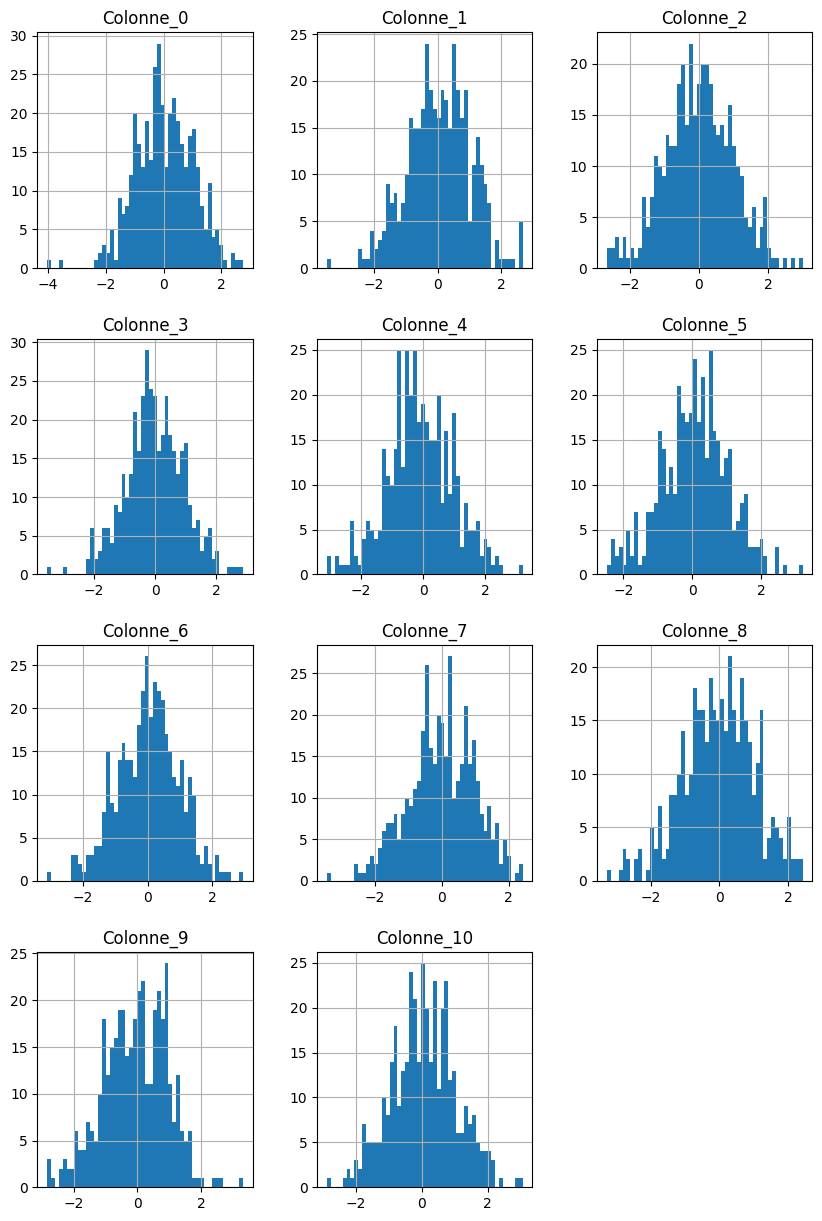

In [16]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,15))
plt.show()

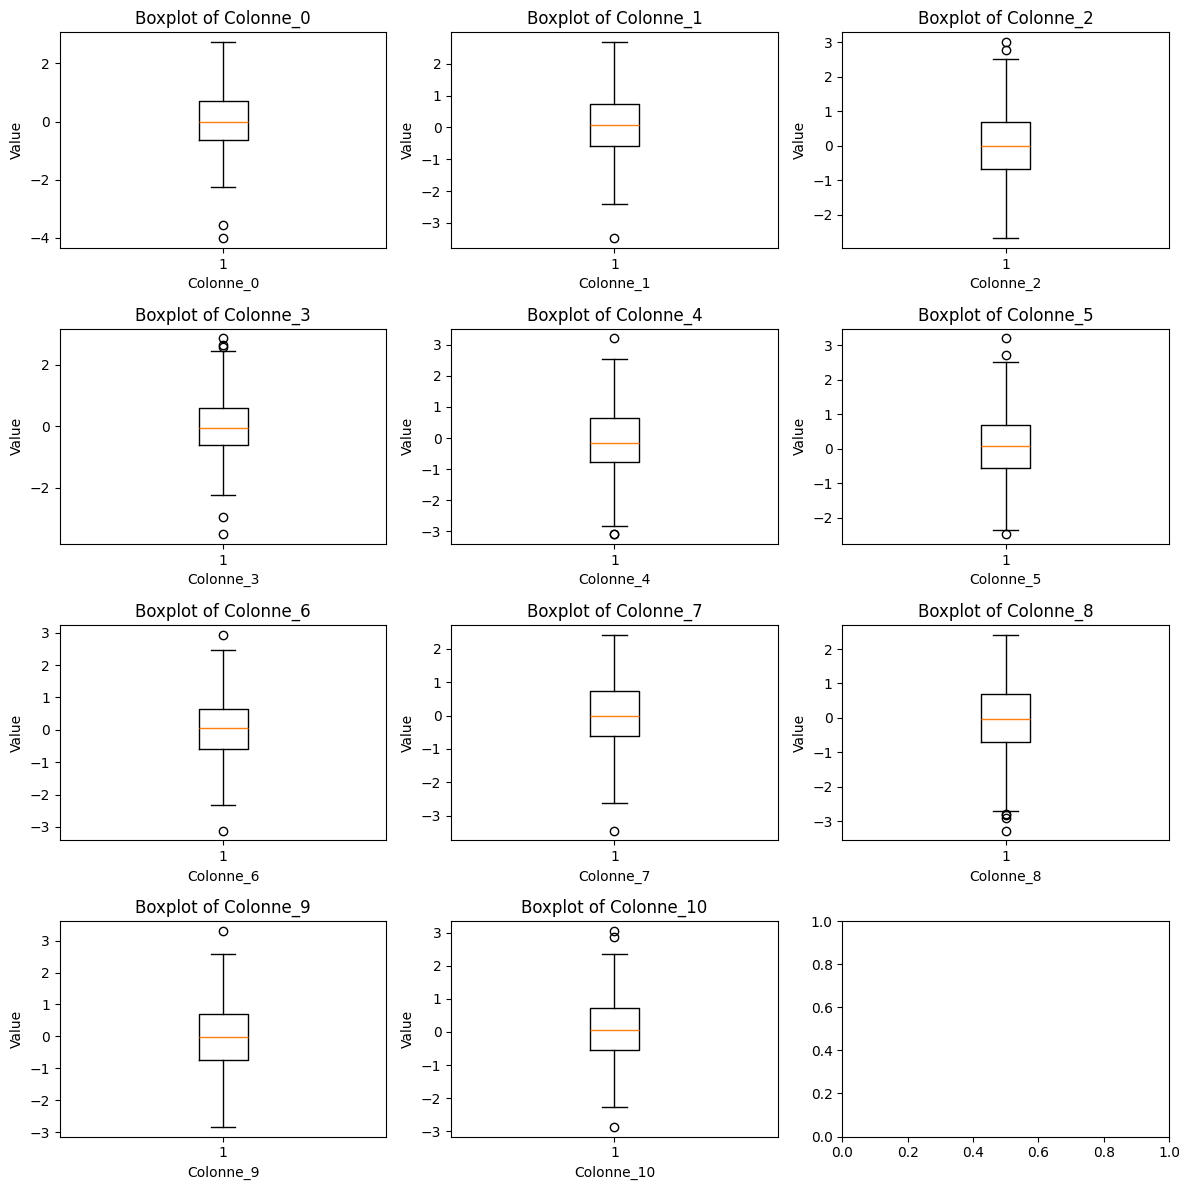

In [18]:
# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

# Boucle pour tracer les boîtes à moustaches de chaque colonne
for i, column in enumerate(df.columns):
    # Calcul des indices de la position du sous-graphique
    row = i // 3
    col = i % 3
    
    # Tracer la boîte à moustaches de la colonne sur le sous-graphique correspondant
    axes[row, col].boxplot(df[column])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title('Boxplot of ' +str(column))

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()
